## Final Project Submission

Please fill out:
* Student name    : MULI LILIAN MWIKALI
* Student pace    : full time HYBRID
* Scheduled project review date/time: 
* Instructor name : ANTONNY MUIKO
* Blog post URL   :


### 1.0 BUSINESS UNDERSTANDING

Our company is launching a new movie studio to tap into the lucrative market of original video content, inspired by the success of major players in the industry. To ensure the success of this venture, we aim to identify the types of films currently thriving at the box office. This involves analyzing box office performance, understanding audience demographics and preferences, and studying market trends and successful competitors. The insights gained will guide our strategic decisions in film production, marketing, and distribution, allowing us to create content that resonates with audiences and achieves commercial success.

### 1.1 Objective
1. The main goal is to determine what type of films are currently successful at the box to inform decisions for a new movie studio
2. Identify popular film genres
3. Identify the most upthriving film studios
4. Analyze the relationship between the office performance and movie ratings

### 2.0 Data Collection and Preparation

In [2]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
# connecting to sqlite database
db_path = r'C:\Users\Admin\Documents\Project\im.db'
conn = sqlite3.connect(db_path)

In [4]:
# Listing the tables in the database
pd.read_sql(
""" 
SELECT * FROM sqlite_master WHERE type='table';
""", conn)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


### Read the csv file

In [5]:
# loading movie_gross file into a dataframe
movie_gross_path = r'C:\Users\Admin\Documents\Project\bom.movie_gross.csv.gz'
movie_gross_df = pd.read_csv(movie_gross_path)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### 2.1 Exploring the data

1. for SQLite database

In [6]:
# calling movie_basic column
movie_basics_df = pd.read_sql("""
SELECT * FROM movie_basics
""", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
movie_basics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [8]:
# calling movie_ratings column
movie_ratings_df = pd.read_sql("""
SELECT * FROM movie_ratings
""", conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
movie_ratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

2. for CSV file

In [10]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
#summary statistics
movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [12]:
# display the column names
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [13]:
movie_gross_df.shape

(3387, 5)

In [14]:
# display the first few rows
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### 2.2 DATA CLEANING MOVIE GROSS.CSV

In [15]:
# Checking for missing values in the dataframe
movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

FILLING MISSING VALUES

In [16]:
# filling in missing values in studio column with 'unknown'
movie_gross_df['studio'].fillna('Unknown', inplace=True)

In [17]:
movie_gross_df['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [18]:
# filling in missing values in domestic gross using median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())
movie_gross_df['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [19]:
movie_gross_df['domestic_gross'].isnull().sum()

0

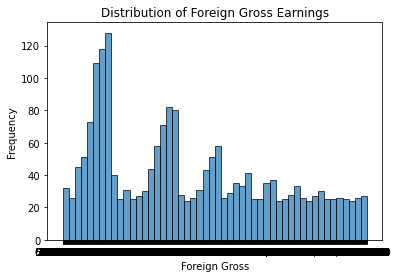

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object


In [20]:
# Plot the distribution of foreign_gross
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Foreign Gross Earnings')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()


# Print summary statistics
print(movie_gross_df['foreign_gross'].describe())

In our histogram above ,,the data is skewed to the right that is we have a longer tail on the right side.we go ahead and fill in the missing values in foreign_gross column using median.

In [21]:
# Remove commas and convert to numeric for foreign_gross
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')
# Change the data type to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
# Fill missing foreign_gross values with the median
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

In [22]:
movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
movie_gross_df['foreign_gross'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382     True
3383     True
3384     True
3385     True
3386     True
Name: foreign_gross, Length: 3387, dtype: bool

In [24]:
#Checking for duplicates
movie_gross_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [25]:
movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

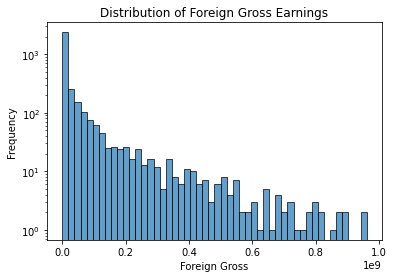

count    3.387000e+03
mean     5.248329e+07
std      1.100461e+08
min      6.000000e+02
25%      1.160000e+07
50%      1.870000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64


In [26]:
# Plot the distribution of foreign_gross
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Foreign Gross Earnings')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


# Print summary statistics
print(movie_gross_df['foreign_gross'].describe())

Filling in the missing values in the foreign_gross column with the median does not alter the overall distribution of the data, hence preserving its accuracy.

In [27]:
#Checking for duplicates
duplicates = movie_gross_df.duplicated().sum()
duplicates

0

### 2.2.2 EXPLORING MOVIE_BASICS AND MOVIE_RATINGS IN IM.DB

#### 1.0 Exploring movie_ratings_df

In [28]:
#getting info for movie_ratings
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
#Getting the shape
movie_ratings_df.shape

(73856, 3)

In [30]:
#descriptive summary statistics for movie_ratings
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [31]:
#checking for null values
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [32]:
#checking for duplicates
duplicates = movie_ratings_df.duplicated().sum()
duplicates

0

Movie_ratings has no null values,,so no cleaning required.

### 1.2 Exploring movie_basics_df

In [33]:
# getting info for movie_basics
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [34]:
#statistical summary 
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [35]:
#checking for duplicates
duplicates = movie_basics_df.duplicated().sum()
duplicates

0

In [36]:
#checking for null values
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [37]:
# Checking for percentage of missing values
(movie_basics_df.isnull().sum()/len(movie_basics_df))*100

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

1. Percentage of missing values in genres and original_title is minimal so dropping the missing rows won't have an effect.
2. Runtime_minutes has relatively a significant percentage of missing values,,filling the rows works well.

In [38]:
# Dropping rows with missing values in genres and original_title columns
movie_basics_df = movie_basics_df.dropna(subset = ['genres','original_title'])

In [39]:
#checking for null values
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

In [40]:
#reading the runtime_minutes column
movie_basics_df['runtime_minutes']

0         175.0
1         114.0
2         122.0
3           NaN
4          80.0
          ...  
146138      NaN
146139    123.0
146140      NaN
146141      NaN
146143      NaN
Name: runtime_minutes, Length: 140734, dtype: float64

In [41]:
#Filling the missing data with median
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(movie_basics_df['runtime_minutes'].median())

<ipython-input-41-e2fbf6a668c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(movie_basics_df['runtime_minutes'].median())


In [42]:
movie_basics_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

#### Saving the cleaned dataframes into csv for visualizations in tableau

In [43]:
# Saving cleaned DataFrames
movie_gross_df.to_csv('cleaned_movie_gross_df', index=False)
movie_basics_df.to_csv('cleaned_movie_basics_df', index=False)
movie_ratings_df.to_csv('cleaned_movie_ratings_df', index=False)

In [44]:
# Merge movie_basics_df with movie_ratings_df on 'movie_id'
merged_df = pd.merge(movie_ratings_df, movie_basics_df, on='movie_id', how='inner')
merged_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73047,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73048,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73049,tt9851050,4.7,14,Sisters,Sisters,2019,87.0,"Action,Drama"
73050,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [45]:
#saving merged_df dataframe into csv
merged_df.to_csv('cleaned_merged_df', index=False)

In [46]:
#merging merged_df with movie_gross_df
final_merged_df = pd.merge(merged_df, movie_gross_df, left_on='primary_title', right_on='title', how='inner')
final_merged_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,1400000.0,3400000.0,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",The Dead Lands,Magn.,5200.0,18700000.0,2015
3016,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",The Wave,Magn.,177000.0,18700000.0,2016
3017,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Hitchcock/Truffaut,Cohen,260000.0,18700000.0,2015
3018,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Boy Erased,Focus,6800000.0,5000000.0,2018


In [47]:
# Verify that there are no more null values
print(final_merged_df.isnull().sum())

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64


In [48]:
#dropping primary_title,original_title
final_merged_df.drop(columns = ['primary_title','original_title'],inplace= True)

In [49]:
#saving the final merged data to csv file
final_merged_df.to_csv('cleaned_merged_movie_data.csv',index=False)

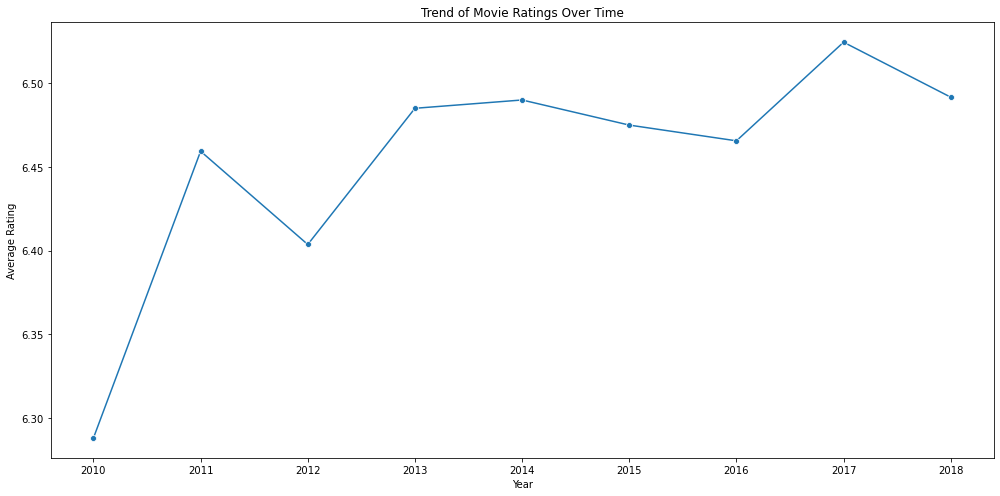

In [50]:
#plotting trend of movie ratings over time
#Grouping by year and calculating average rating
yearly_ratings = final_merged_df.groupby('year')['averagerating'].mean().reset_index()

# plotting the graph
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='averagerating', data=yearly_ratings, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trend of Movie Ratings Over Time')
plt.tight_layout()
plt.show()
